In [1]:
!pip install google_images_download

You are using pip version 19.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal national park", "limit": 20,
             "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal national park
Evaluating...
Starting Download...
Image URL: https://npca.s3.amazonaws.com/images/8135/2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg?1445969501
Completed Image ====> 1. 2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg
Image URL: https://i.ytimg.com/vi/P8NJa_YoRxk/maxresdefault.jpg
Completed Image ====> 2. maxresdefault.jpg
Image URL: https://greenglobaltravel.com/wp-content/uploads/2017/04/Best-National-Parks-In-USA-For-Wildlife-Watching.jpg
Completed Image ====> 3. best-national-parks-in-usa-for-wildlife-watching.jpg
Image URL: https://www.nps.gov/voya/learn/nature/images/VOYA_web_deer.jpg?maxwidth=1200&maxheight=1200&autorotate=false
Completed Image ====> 4. voya_web_deer.jpg
Image URL: https://www.princess.com/images/global/learn/cruise-destinations/alaska-cruises/alaska-cruise-tips/cruise-preparation-and-tips/spot-denali-national-parks-animals.jpg
Completed Image ====> 5. spot-denali-national-parks-animals.jpg
Image URL: https://n

In [3]:
absolute_image_paths

{'animal national park': ['E:\\ds\\DS-Unit-4-Sprint-4-Deep-Learning\\module2-convolutional-neural-networks\\downloads\\animal national park\\1. 2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg',
  'E:\\ds\\DS-Unit-4-Sprint-4-Deep-Learning\\module2-convolutional-neural-networks\\downloads\\animal national park\\2. maxresdefault.jpg',
  'E:\\ds\\DS-Unit-4-Sprint-4-Deep-Learning\\module2-convolutional-neural-networks\\downloads\\animal national park\\3. best-national-parks-in-usa-for-wildlife-watching.jpg',
  'E:\\ds\\DS-Unit-4-Sprint-4-Deep-Learning\\module2-convolutional-neural-networks\\downloads\\animal national park\\4. voya_web_deer.jpg',
  'E:\\ds\\DS-Unit-4-Sprint-4-Deep-Learning\\module2-convolutional-neural-networks\\downloads\\animal national park\\5. spot-denali-national-parks-animals.jpg',
  'E:\\ds\\DS-Unit-4-Sprint-4-Deep-Learning\\module2-convolutional-neural-networks\\downloads\\animal national park\\6. 084ac382-5aff-4674-9555-482e5ff07c0b-banner.jpg',
  'E:\\ds\\DS-Unit-4

# Assignment

Load a pretrained network from TensorFlow Hub, [ResNet50](https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1) - a 50 layer deep network trained to recognize [1000 objects](https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt). Starting usage:

```python
module = hub.Module("https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1")
height, width = hub.get_expected_image_size(module)
images = ...  # A batch of images with shape [batch_size, height, width, 3].
logits = module(images)  # Logits with shape [batch_size, num_classes].
```

Apply it to classify the images downloaded below (images from a search for animals in national parks):

Report both the most likely estimated class for any image, and also investigate (a) images where the classifier isn't that certain (the best estimate is low), and (b) images where the classifier fails.

Answer (in writing in the notebook) the following - "What sorts of images do CNN classifiers do well with? What sorts do they not do so well? And what are your hypotheses for why?"

In [4]:
import tensorflow as tf
import tensorflow_hub as hub

C:\Users\cwcol\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
W0410 12:52:20.300993 14224 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


In [5]:
module = hub.Module("https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1")


In [6]:
height, width = hub.get_expected_image_size(module)
print(height, width)

224 224


In [7]:
images = absolute_image_paths["animal national park"]  # A batch of images with shape [batch_size, height, width, 3].


In [8]:
print(images[0])

E:\ds\DS-Unit-4-Sprint-4-Deep-Learning\module2-convolutional-neural-networks\downloads\animal national park\1. 2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg


In [9]:
from PIL import Image, ImageOps

In [10]:
def resize_image(filename, new_width=224, new_height=224):
    pil_image = Image.open(filename)
    pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
    pil_image_rgb = pil_image.convert('RGB')
    pil_image_rgb.save(filename, format='JPEG', quality=90)

In [11]:
i1 = resize_image(images[0])
i1 = images[0]

In [12]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
def show_images(image_path_list):
    plt.figure()
    for i, image_path in enumerate(image_path_list):
        plt.subplot(1, len(image_path_list), i+1)
        plt.imshow(np.asarray(Image.open(image_path)))
        plt.title(image_path)
        plt.grid(False)
        plt.yticks([])
        plt.xticks([])
    plt.show()


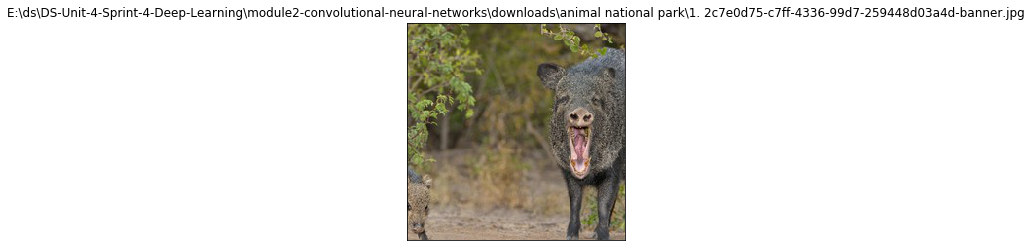

In [13]:
show_images([images[0]])

In [14]:
from keras.preprocessing import image
def process_img_path(img_path):
    return image.load_img(img_path, target_size=(224, 224))
i1 = image.img_to_array(process_img_path(images[0]))
#logits = module(process_img_path(images[0]))

Using TensorFlow backend.


In [15]:
i1 /= 255

In [16]:
i1

array([[[0.49019608, 0.47843137, 0.21568628],
        [0.49803922, 0.48235294, 0.24313726],
        [0.45490196, 0.42352942, 0.23137255],
        ...,
        [0.20392157, 0.16862746, 0.14117648],
        [0.19215687, 0.15686275, 0.12941177],
        [0.17254902, 0.13725491, 0.10980392]],

       [[0.5254902 , 0.5019608 , 0.29803923],
        [0.52156866, 0.49019608, 0.29803923],
        [0.47843137, 0.44313726, 0.27450982],
        ...,
        [0.21176471, 0.1764706 , 0.14117648],
        [0.2       , 0.16470589, 0.12941177],
        [0.18431373, 0.14901961, 0.11372549]],

       [[0.5647059 , 0.5294118 , 0.41568628],
        [0.5529412 , 0.50980395, 0.38431373],
        [0.53333336, 0.49411765, 0.35686275],
        ...,
        [0.22352941, 0.19215687, 0.14901961],
        [0.21960784, 0.1882353 , 0.14509805],
        [0.20392157, 0.17254902, 0.12941177]],

       ...,

       [[0.7019608 , 0.6313726 , 0.5529412 ],
        [0.6901961 , 0.61960787, 0.5411765 ],
        [0.6862745 , 0

In [17]:
from skimage import color
from skimage.exposure import rescale_intensity
grayscale = rescale_intensity(1 - color.rgb2gray(i1))
grayscale

array([[0.4945696 , 0.48734209, 0.54570692, ..., 0.81703743, 0.83021749,
        0.85218426],
       [0.46065726, 0.47101989, 0.520906  , ..., 0.80888424, 0.8220643 ,
        0.83963772],
       [0.41981752, 0.4408674 , 0.46032471, ..., 0.79287793, 0.79727129,
        0.8148447 ],
       ...,
       [0.29433717, 0.30751723, 0.32260664, ..., 0.43931786, 0.42580434,
        0.39787711],
       [0.316604  , 0.32539071, 0.32602423, ..., 0.46440218, 0.4383254 ,
        0.41823459],
       [0.34765755, 0.36711484, 0.35175084, ..., 0.43048898, 0.42544541,
        0.43012213]])

In [18]:
i1.shape

(224, 224, 3)

In [19]:
logits = module(i1)

TypeError: Can't convert 'images': Shape TensorShape([Dimension(224), Dimension(224), Dimension(3)]) is incompatible with TensorShape([Dimension(None), Dimension(224), Dimension(224), Dimension(3)])

In [20]:
import numpy as np
import keras
from keras.applications.resnet50 import ResNet50

from keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.python.keras import backend as K

In [21]:
K.clear_session()
tf.reset_default_graph()
def process_img_path(img_path):
    return image.load_img(img_path, target_size=(224, 224))

def classify_image(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=3)[0]
    print(results)

In [22]:
classify_image(i1)

UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv1/convolution}} = Conv2D[T=DT_FLOAT, data_format="NCHW", dilations=[1, 1, 1, 1], padding="VALID", strides=[1, 1, 2, 2], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv1/convolution-0-TransposeNHWCToNCHW-LayoutOptimizer, conv1/kernel/read)]]
	 [[{{node fc1000/Softmax/_2349}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_2230_fc1000/Softmax", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Stretch goals
- Enhance your code to use classes/functions and accept terms to search and classes to look for in recognizing the downloaded images (e.g. download images of parties, recognize all that contain balloons)
- Check out [other available pretrained networks](https://tfhub.dev), try some and compare
- Image recognition/classification is somewhat solved, but *relationships* between entities and describing an image is not - check out some of the extended resources (e.g. [Visual Genome](https://visualgenome.org/)) on the topic
- Transfer learning - using images you source yourself, [retrain a classifier](https://www.tensorflow.org/hub/tutorials/image_retraining) with a new category
- (Not CNN related) Use [piexif](https://pypi.org/project/piexif/) to check out the metadata of images passed in to your system - see if they're from a national park! (Note - many images lack GPS metadata, so this won't work in most cases, but still cool)

Resources
- [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) - influential paper (introduced ResNet)
- [YOLO: Real-Time Object Detection](https://pjreddie.com/darknet/yolo/) - an influential convolution based object detection system, focused on inference speed (for applications to e.g. self driving vehicles)
- [R-CNN, Fast R-CNN, Faster R-CNN, YOLO](https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e) - comparison of object detection systems
- [Common Objects in Context](http://cocodataset.org/) - a large-scale object detection, segmentation, and captioning dataset
- [Visual Genome](https://visualgenome.org/) - a dataset, a knowledge base, an ongoing effort to connect structured image concepts to language